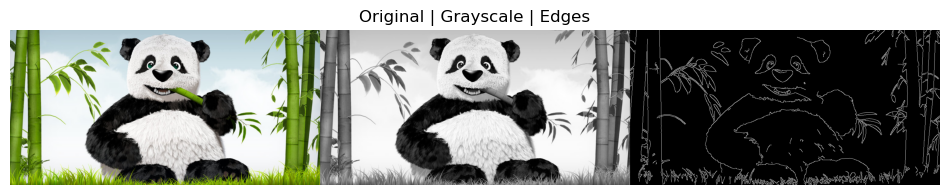

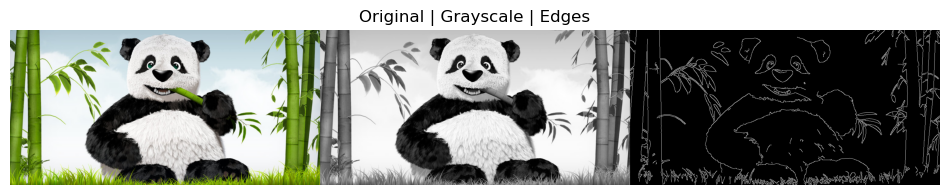

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use the already loaded 'img' variable

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection (Canny)
edges = cv2.Canny(blur, 100, 200)

# Combine images horizontally
combined = np.hstack((img, cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR),
                      cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)))

# Convert BGR to RGB for matplotlib display
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Show output using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(combined_rgb)
plt.axis('off')
plt.title("Original | Grayscale | Edges")
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Use the already loaded 'img' variable

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection (Canny)
edges = cv2.Canny(blur, 100, 200)

# Combine images horizontally
combined = np.hstack((img, cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR),
                      cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)))

# Convert BGR to RGB for matplotlib display
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Show output using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(combined_rgb)
plt.axis('off')
plt.title("Original | Grayscale | Edges")
plt.show()

In [4]:
img = cv2.imread(r"C:\Users\ikon\Desktop\CV\img1.jpg")

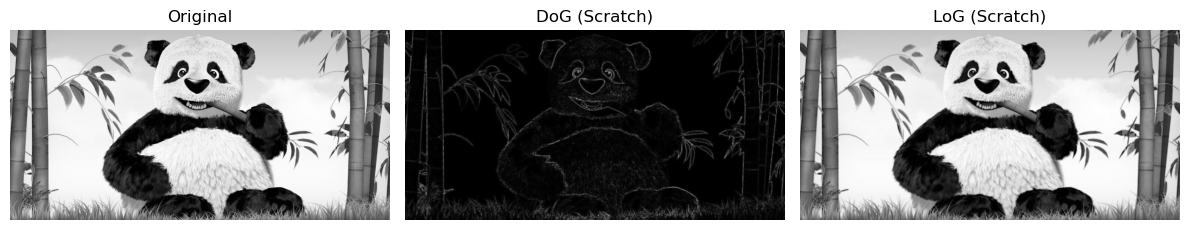

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = cv2.imread(r"C:\Users\ikon\Desktop\CV\img1.jpg", cv2.IMREAD_GRAYSCALE)
if gray is None:
    print("Could not load image. Check file path.")
    exit()

# Gaussian Kernel (5x5)
gaussian_kernel = (1/273) * np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
], dtype=np.float32)

# Apply Gaussian blur 
gaussian = cv2.filter2D(gray, -1, gaussian_kernel)

# DoG = Original - Gaussian
dog = gray.astype(np.float32) - gaussian.astype(np.float32)
dog = cv2.convertScaleAbs(dog)

# Laplacian Kernel (3x3)
laplacian_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

# Apply Laplacian 
laplacian = cv2.filter2D(gaussian, -1, laplacian_kernel)

# LoG = Laplacian - Gaussian
log = laplacian.astype(np.float32) - gaussian.astype(np.float32)
log = cv2.convertScaleAbs(log)

# Show results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("DoG (Scratch)")
plt.imshow(dog, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("LoG (Scratch)")
plt.imshow(log, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

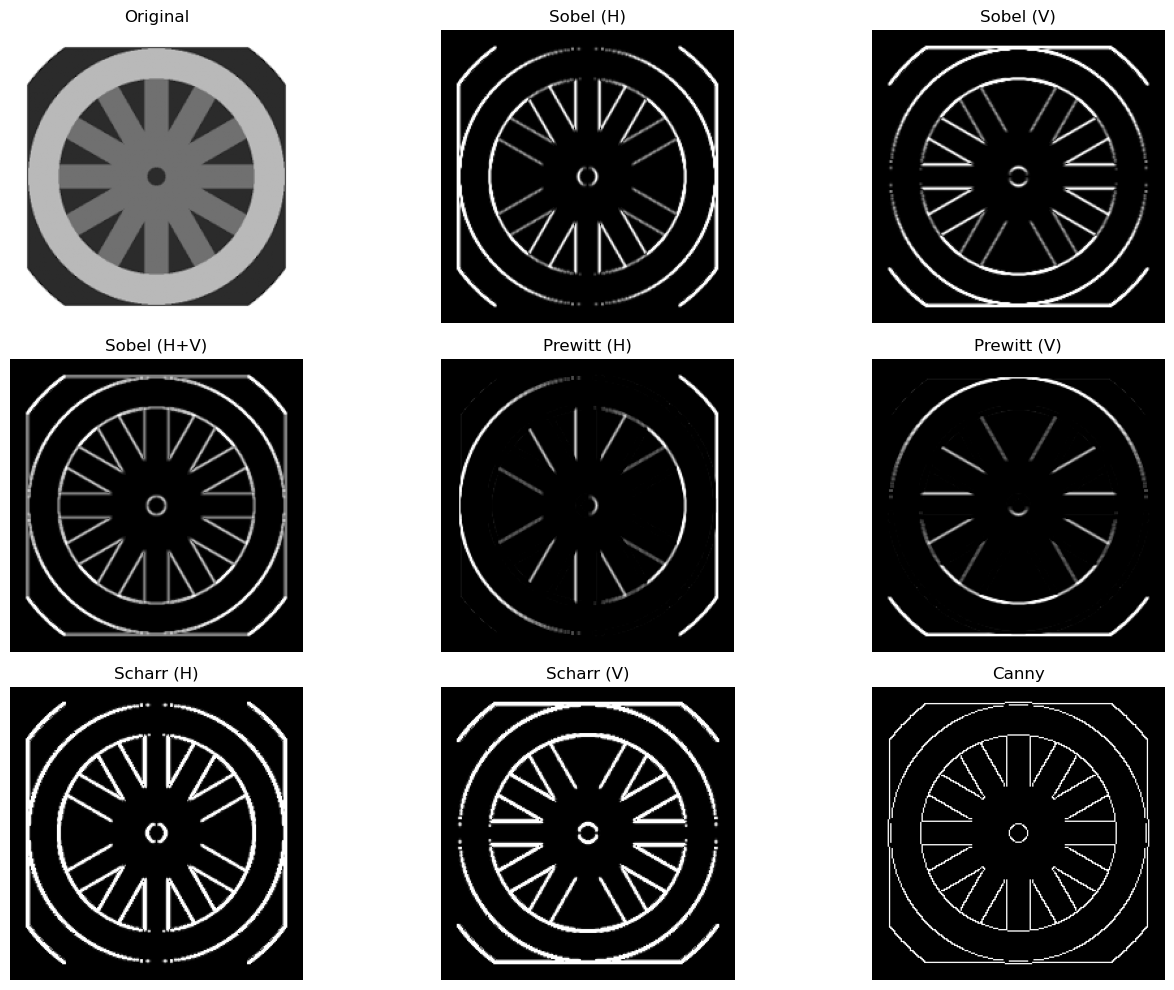

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("wheel.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Could not load image. Make sure wheel.png is in the same folder.")
    exit()

# Sobel (Horizontal, Vertical, Combined)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Prewitt (Horizontal & Vertical)

prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

prewitt_x = cv2.filter2D(img, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(img, -1, prewitt_kernel_y)

# Scharr (Horizontal & Vertical)

scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharr_x = cv2.convertScaleAbs(scharr_x)
scharr_y = cv2.convertScaleAbs(scharr_y)

# Canny Edge Detection

canny = cv2.Canny(img, 100, 200)

# Display results

titles = [
    "Original",
    "Sobel (H)", "Sobel (V)", "Sobel (H+V)",
    "Prewitt (H)", "Prewitt (V)",
    "Scharr (H)", "Scharr (V)",
    "Canny"
]

images = [
    img,
    sobel_x, sobel_y, sobel_combined,
    prewitt_x, prewitt_y,
    scharr_x, scharr_y,
    canny
]

plt.figure(figsize=(14, 10))

for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
